In [1]:
#Paquetes necesarios: numpy, matplotlib y astropy
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import ZScaleInterval

In [2]:
bias1=fits.open('bias/Bias_1x1_00000357.fit')[0].data
bias2=fits.open('bias/Bias_1x1_00000358.fit')[0].data
bias3=fits.open('bias/Bias_1x1_00000359.fit')[0].data
bias4=fits.open('bias/Bias_1x1_00000360.fit')[0].data
bias5=fits.open('bias/Bias_1x1_00000361.fit')[0].data
bias6=fits.open('bias/Bias_1x1_00000362.fit')[0].data
bias7=fits.open('bias/Bias_1x1_00000363.fit')[0].data
bias8=fits.open('bias/Bias_1x1_00000364.fit')[0].data
bias9=fits.open('bias/Bias_1x1_00000365.fit')[0].data
bias10=fits.open('bias/Bias_1x1_00000366.fit')[0].data

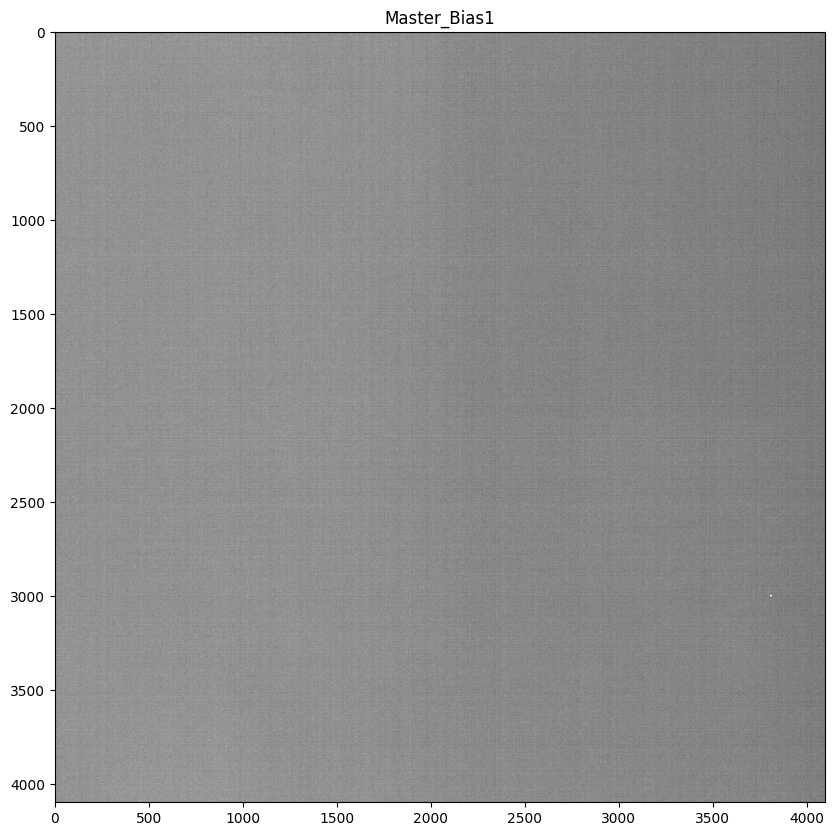

In [3]:
#Grafiquemos un bias
zscale=ZScaleInterval(contrast=0.25)
min_value,max_value=zscale.get_limits(bias1)

fig=plt.figure(figsize=(10,10))
plt.title('Master_Bias1')
plt.imshow(bias1,vmin=min_value,vmax=max_value,cmap='gray')
plt.show()

In [4]:
#Combinemos los bias para generar un master bias
master_bias=np.mean([bias1,bias2,bias3,bias4,bias5,bias6,bias7,bias8,bias9,bias10],axis=0)
master_bias.shape

(4096, 4096)

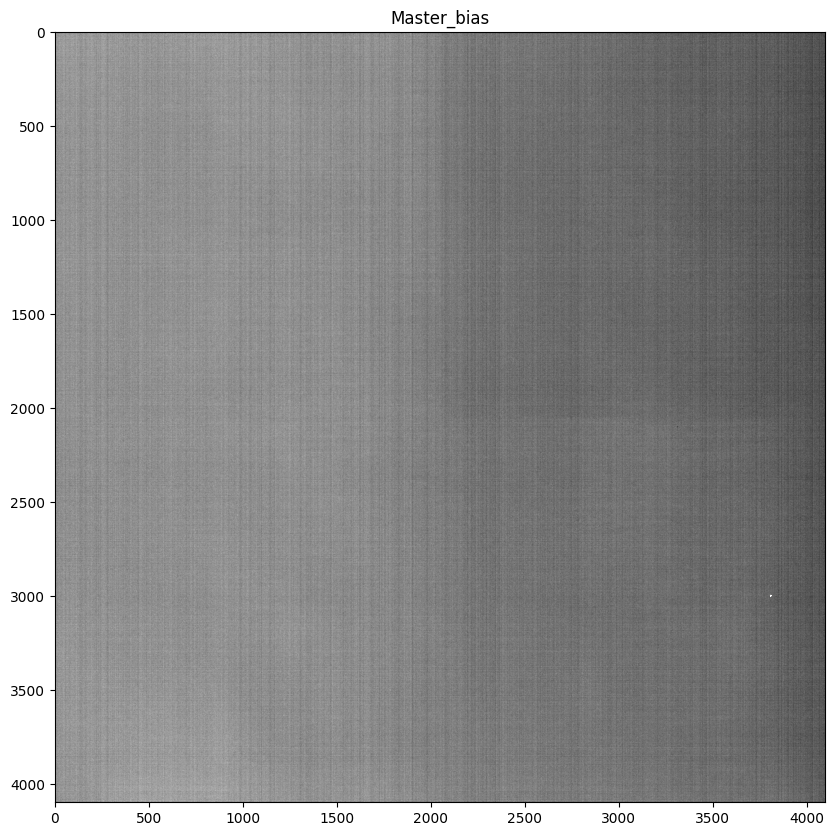

In [5]:
#Grafiquemoslo
zscale=ZScaleInterval(contrast=0.1)
min_value,max_value=zscale.get_limits(master_bias)
fig=plt.figure(figsize=(10,10))
plt.imshow(master_bias,vmin=min_value,vmax=max_value,cmap='gray')
plt.title('Master_bias')
plt.savefig('Master_bias normalizado')
plt.show()

In [6]:
from astropy.io import fits
hdu = fits.PrimaryHDU(master_bias)
hdu.writeto('master_bias.fit', overwrite=True)